In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Classic Models: Sales and Performance Analysis

**Objective**: Analyze sales data from Classic Models to derive insights into customer spending patterns, product line performance, employee contribution, and overall sales trends. This report aims to provide actionable recommendations to optimize sales strategies and identify high-value customers.


In [ ]:

import pandas as pd

customers = pd.read_csv('/content/classicmodels/customers.csv')
employees = pd.read_csv('/content/classicmodels/employees.csv')
offices = pd.read_csv('/content/classicmodels/offices.csv')
orders = pd.read_csv('/content/classicmodels/orders.csv')
order_details = pd.read_csv('/content/classicmodels/orderdetails.csv')
payments = pd.read_csv('/content/classicmodels/payments.csv')
products = pd.read_csv('/content/classicmodels/products.csv')
productlines = pd.read_csv('/content/classicmodels/productlines.csv')

# Display sample data to verify loading
print(customers.head())
print(orders.head())



   customerNumber                customerName contactLastName  \
0             103           Atelier graphique         Schmitt   
1             112          Signal Gift Stores            King   
2             114  Australian Collectors, Co.        Ferguson   
3             119           La Rochelle Gifts         Labrune   
4             121          Baane Mini Imports      Bergulfsen   

  contactFirstName         phone                  addressLine1 addressLine2  \
0          Carine     40.32.2555                54, rue Royale          NaN   
1             Jean    7025551838               8489 Strong St.          NaN   
2            Peter  03 9520 4555             636 St Kilda Road      Level 3   
3          Janine     40.67.8555  67, rue des Cinquante Otages          NaN   
4           Jonas     07-98 9555        Erling Skakkes gate 78          NaN   

        city     state postalCode    country  salesRepEmployeeNumber  \
0     Nantes       NaN      44000     France                  

Cleaning the DATA

*The dataset includes multiple tables related to customers, orders, products, employees, and payments. These tables were merged to create a comprehensive view of sales activity and customer behavior. Data cleaning included handling missing values, converting columns to appropriate data types, and merging tables for unified analysis.*


In [ ]:
# Check for missing values in each DataFrame and handle them appropriately
print(customers.isnull().sum())
customers.fillna(method='ffill', inplace=True)

# Convert date columns to datetime
orders['orderDate'] = pd.to_datetime(orders['orderDate'])
payments['paymentDate'] = pd.to_datetime(payments['paymentDate'])

# Merging data to create a comprehensive dataset for analysis
merged_data = orders.merge(order_details, on='orderNumber') \
                    .merge(customers, on='customerNumber') \
                    .merge(products, on='productCode') \
                    .merge(employees, left_on='salesRepEmployeeNumber', right_on='employeeNumber')


# Display the first few rows of the merged dataset
print(merged_data.head())

# Alternatively, to see a larger preview
from IPython.display import display

display(merged_data.head(5))  # This will display the first 5 rows for better visualization


customerNumber              0
customerName                0
contactLastName             0
contactFirstName            0
phone                       0
addressLine1                0
addressLine2              100
city                        0
state                      73
postalCode                  7
country                     0
salesRepEmployeeNumber     22
creditLimit                 0
dtype: int64
   orderNumber  orderDate requiredDate shippedDate   status  \
0        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
1        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
2        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
3        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
4        10101 2003-01-09   2003-01-18  2003-01-11  Shipped   

                 comments  customerNumber    month productCode  \
0                     NaN             363  2003-01    S18_1749   
1                     NaN             363  2003-01    S18_2248   
2                   

<ipython-input-8-5a5ffb010726>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers.fillna(method='ffill', inplace=True)


,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber,month,productCode,quantityOrdered,...,buyPrice,MSRP,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,2003-01,S18_1749,30,...,86.70,170.00,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep
1,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,2003-01,S18_2248,50,...,33.30,60.54,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep
2,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,2003-01,S18_4409,22,...,43.26,92.03,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep
3,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,2003-01,S24_3969,49,...,21.75,41.03,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep
4,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128,2003-01,S18_2325,25,...,58.48,127.13,1504,Jones,Barry,x102,bjones@classicmodelcars.com,7,1102.0,Sales Rep


**Explanation of the Merge Process:**

We merged multiple tables to create a comprehensive dataset that includes order details, customer information, employee details, and product information.

*The key steps in merging:*


1.   Orders and Order Details were merged on orderNumber to get each product ordered in every order.
2.   Customers were merged with orders on customerNumber to attach each order to its corresponding customer.
3. Products were merged using productCode to enrich the order data with product details.
4. Employees were merged using the salesRepEmployeeNumber from customers, connecting each customer to the employee who managed their orders.


*Purpose: Merging all these tables allowed us to perform complex analysis, such as calculating total spending per customer, average fulfillment time per employee, and understanding sales performance by product line. This kind of enriched dataset is essential for making comprehensive, data-driven business insights.*

Applying descriptive analytics

In [ ]:
# Average Order Size
average_order_size = merged_data['priceEach'] * merged_data['quantityOrdered']
average_order_value = average_order_size.mean()

# Total Revenue
total_revenue = average_order_size.sum()

print(f'Average Order Value: {average_order_value}')
print(f'Total Revenue: {total_revenue}')


Average Order Value: 3205.671098130841
Total Revenue: 9604190.61


Viusalisations of the analytics

**What is Order Value and Count?**


1.  Order Value (order_value): In the histogram where we visualize the distribution of order values, the order value is calculated by multiplying the unit price (priceEach) by the quantity ordered (quantityOrdered). This metric helps us understand how much value each order has in terms of monetary contribution.
2.   Count: The count in the histogram shows the frequency of orders at each value range. This helps us understand how often orders of a specific value range are placed


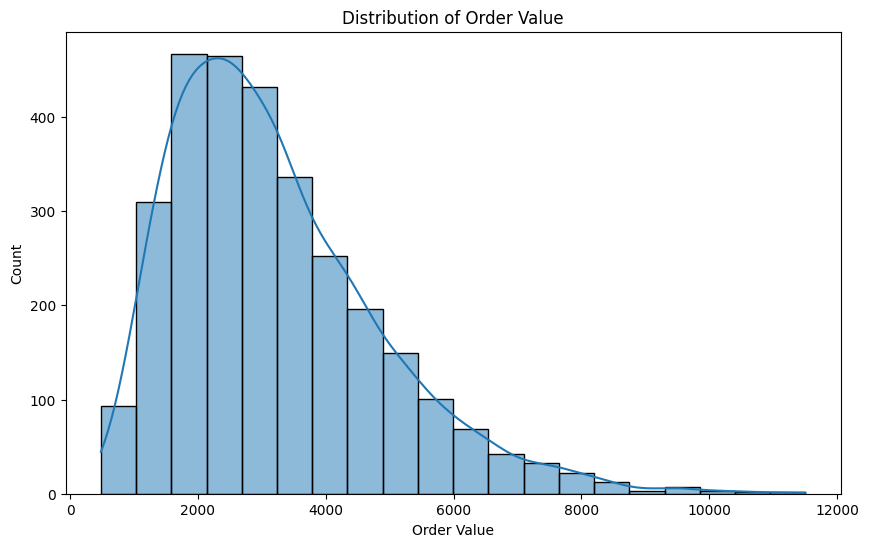

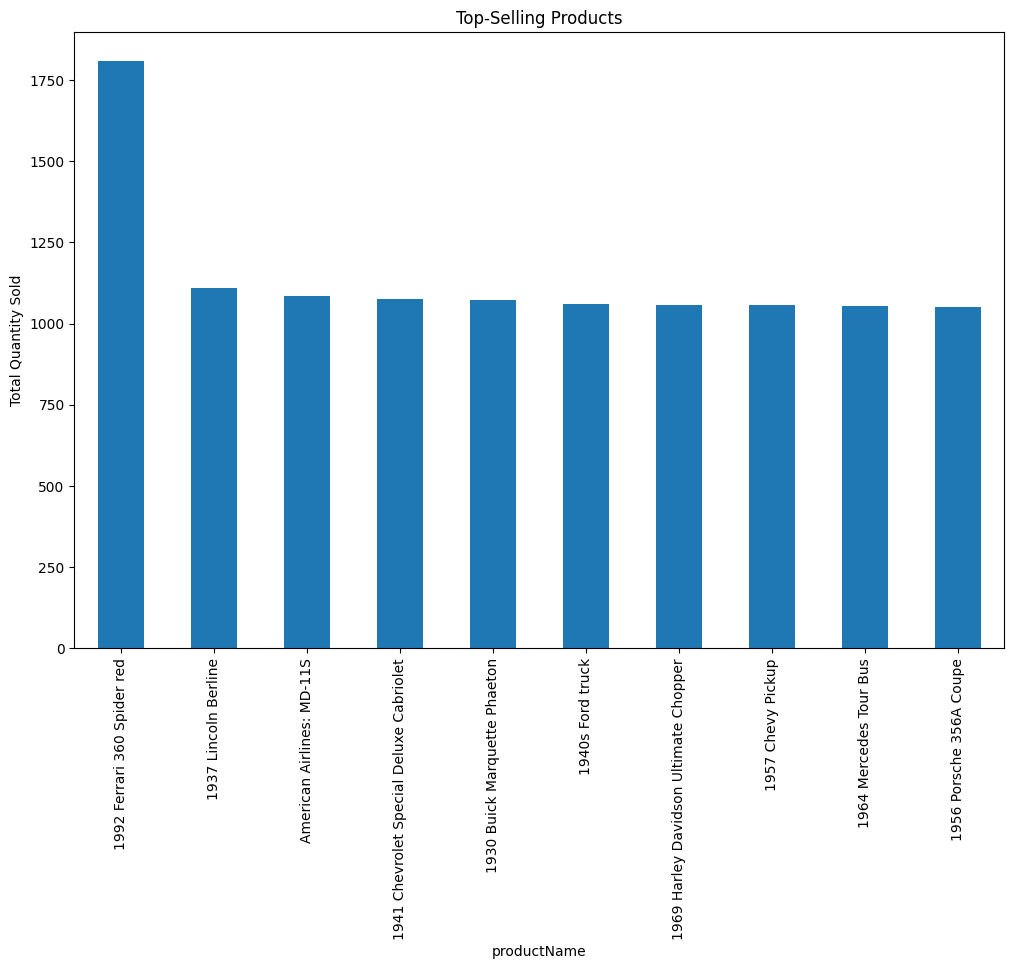

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(average_order_size, bins=20, kde=True)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.show()

# Bar Chart for Product Sales
top_products = merged_data.groupby('productName')['quantityOrdered'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.ylabel('Total Quantity Sold')
plt.show()


# Model Building – Detailed Analysis

### Average Customer Spend Analysis

*Average customer spending was analyzed by product line, country, and sales channel to identify spending patterns.*


1.   By Product Line.
2.   By Country.
3.   By Sales Channel.





**Average Customer Analysis - What is priceEach?**

*  priceEach represents the unit price of the product that is being ordered. It tells us the cost per unit of the product.
*   When we calculate Average Customer Spend, we multiply priceEach by quantityOrdered to determine the total spending for each line item in the order.

**We classify the sales channels into two categories:**

*   Corporate: Orders with a value greater than $5000.
*   Retail: All other orders.






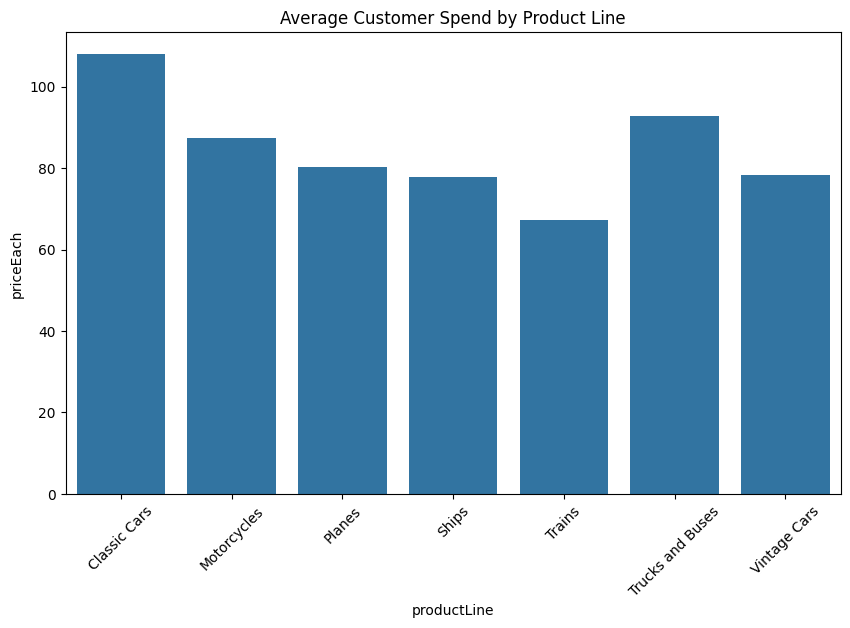

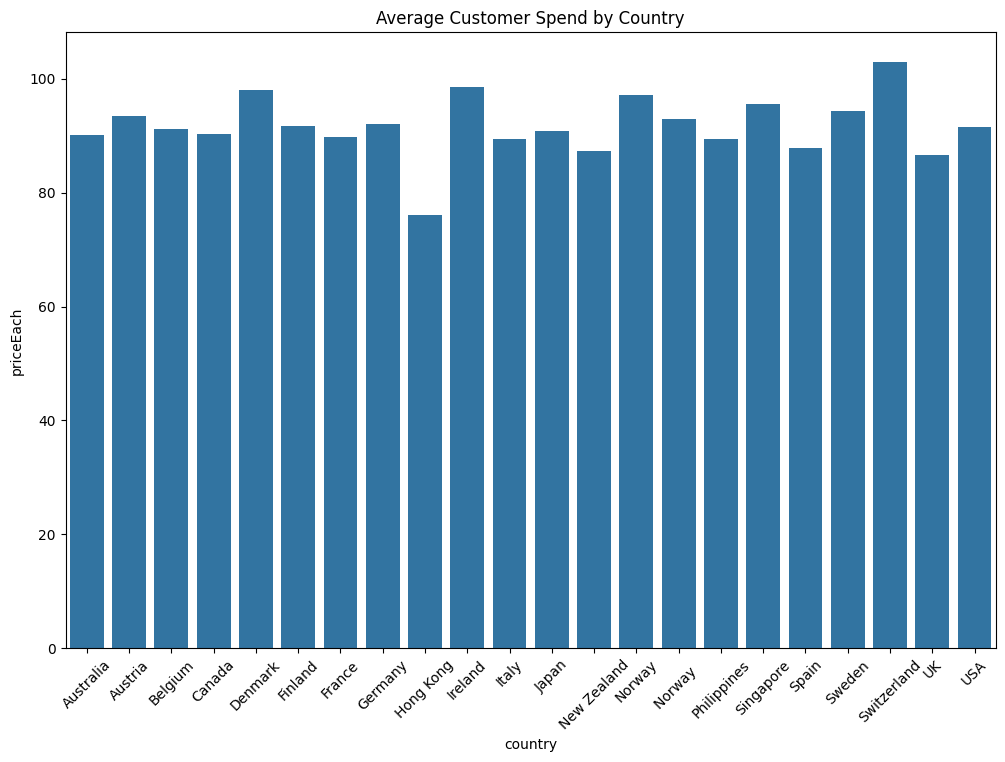

  salesChannel   orderValue
0    Corporate  6284.171439
1       Retail  2717.587131


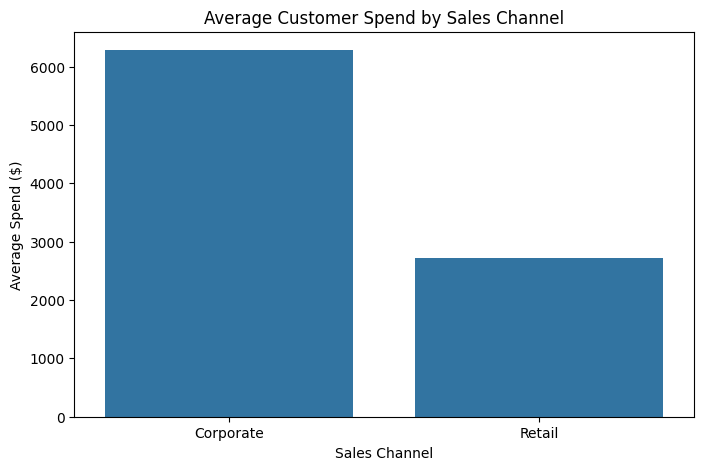

In [ ]:
# Average Customer Spend by Product Line
average_spend_product_line = merged_data.groupby('productLine')['priceEach'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='productLine', y='priceEach', data=average_spend_product_line)
plt.title('Average Customer Spend by Product Line')
plt.xticks(rotation=45)
plt.show()

# Average Customer Spend by Country
average_spend_country = merged_data.groupby('country')['priceEach'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='priceEach', data=average_spend_country)
plt.title('Average Customer Spend by Country')
plt.xticks(rotation=45)
plt.show()

# Calculate order value for each line item
merged_data['orderValue'] = merged_data['priceEach'] * merged_data['quantityOrdered']

# Categorize sales channels based on order value
merged_data['salesChannel'] = merged_data['orderValue'].apply(lambda x: 'Corporate' if x > 5000 else 'Retail')

# Average Customer Spend by Sales Channel
average_spend_sales_channel = merged_data.groupby('salesChannel')['orderValue'].mean().reset_index()

# Display the result
print(average_spend_sales_channel)

# Visualization: Average Customer Spend by Sales Channel
plt.figure(figsize=(8, 5))
sns.barplot(x='salesChannel', y='orderValue', data=average_spend_sales_channel)
plt.title('Average Customer Spend by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Spend ($)')
plt.show()


### Product Line Sales Performance

*The performance of different product lines was analyzed to determine which product lines contributed the most to sales volume and revenue.*


*   Total Revenue by Product Line.
*   Sales Volume by Product Line.




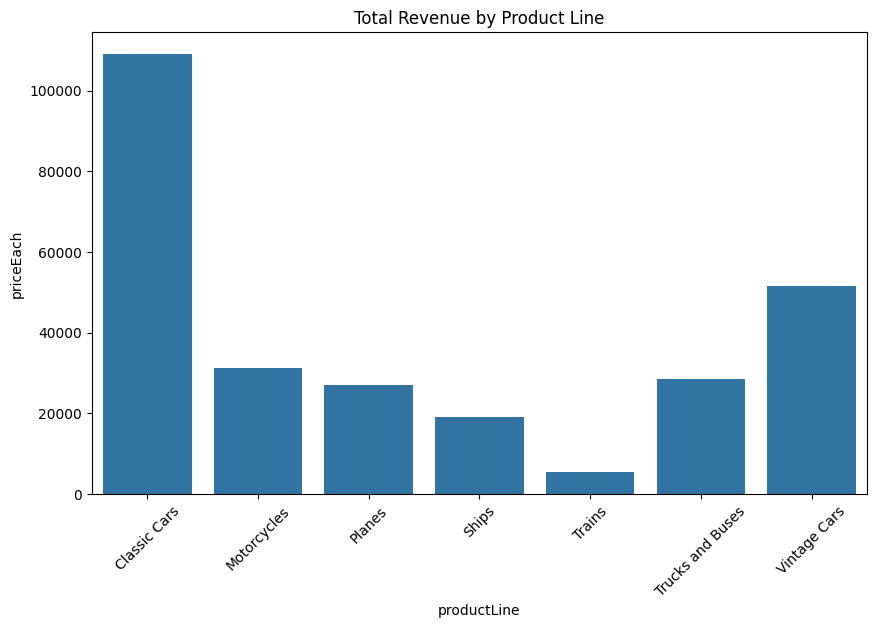

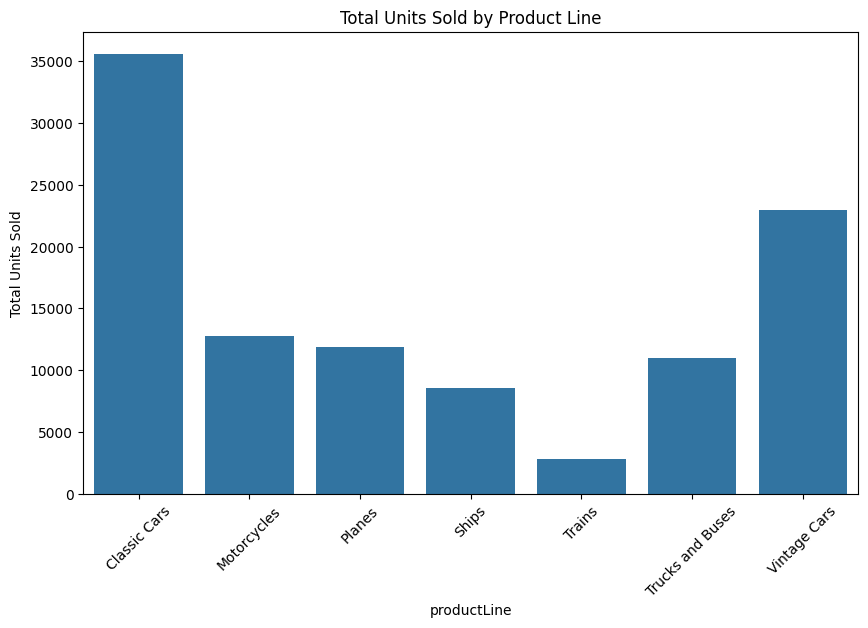

In [ ]:
# Total Revenue by Product Line
revenue_product_line = merged_data.groupby('productLine')['priceEach'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='productLine', y='priceEach', data=revenue_product_line)
plt.title('Total Revenue by Product Line')
plt.xticks(rotation=45)
plt.show()

# Sales Volume by Product Line (Total Units Sold)
sales_volume_product_line = merged_data.groupby('productLine')['quantityOrdered'].sum().reset_index()

# Visualization for Sales Volume by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x='productLine', y='quantityOrdered', data=sales_volume_product_line)
plt.title('Total Units Sold by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Units Sold')
plt.show()



High-Value Customers and Sales Trends

*   High-Value Customers: Identify top customers.
*   Monthly Sales Trends: Analyze revenue trends.

*High-value customers were identified based on total spending. Additionally, sales trends were analyzed on a monthly basis to identify seasonality and peak periods.*



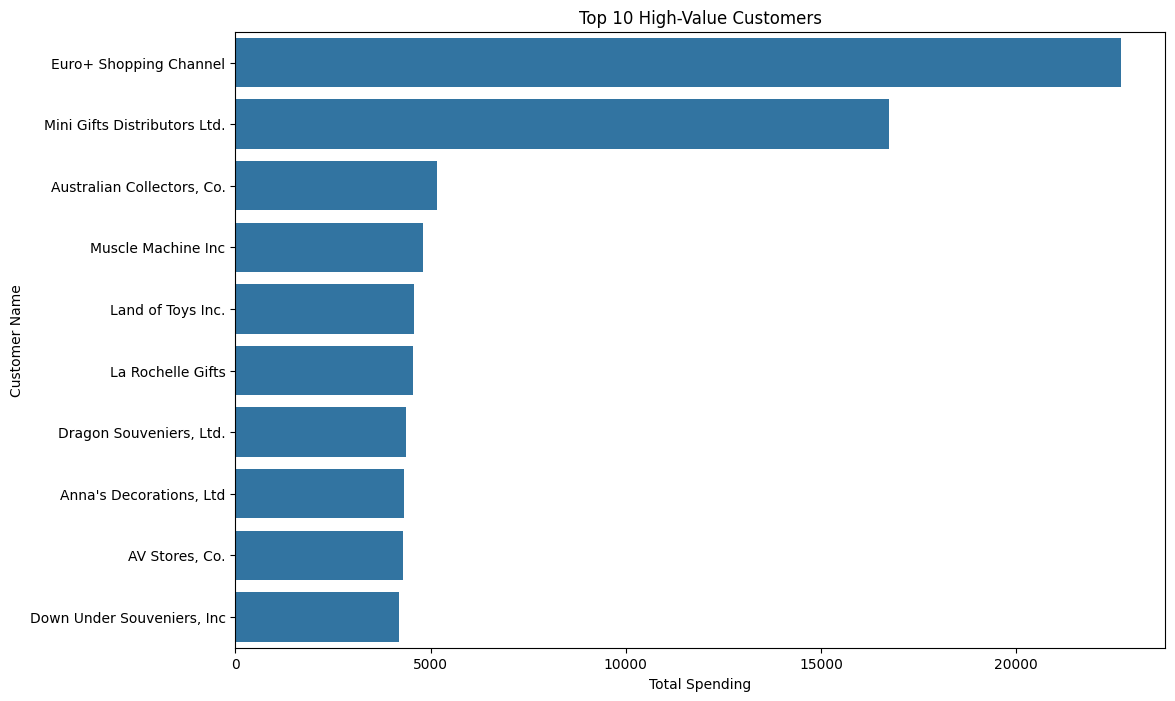

<ipython-input-11-8efd074c6e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_trend = merged_data.set_index('orderDate').resample('M')['priceEach'].sum().reset_index()


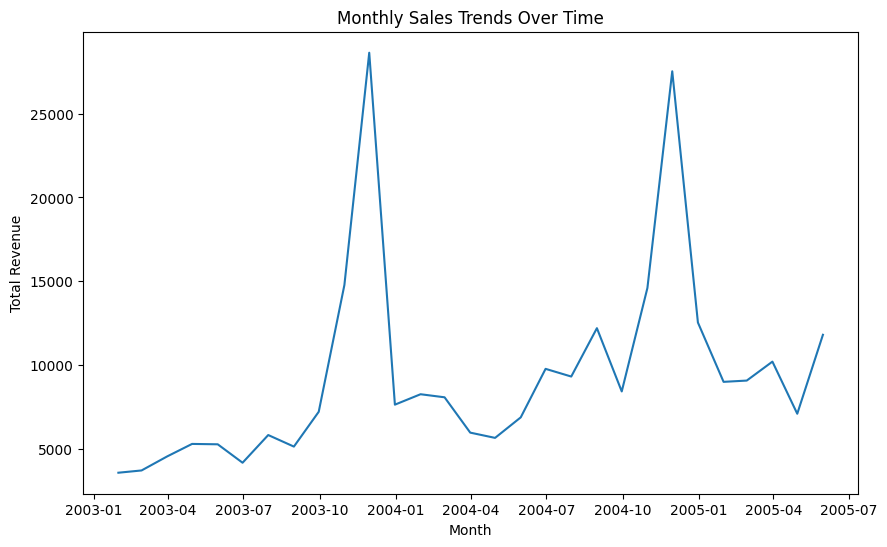

In [ ]:
# Identify High-Value Customers
customer_spending = merged_data.groupby('customerName')['priceEach'].sum().reset_index()
high_value_customers = customer_spending.sort_values(by='priceEach', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='priceEach', y='customerName', data=high_value_customers)
plt.title('Top 10 High-Value Customers')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

# Monthly Sales Trends
monthly_sales_trend = merged_data.set_index('orderDate').resample('M')['priceEach'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='orderDate', y='priceEach', data=monthly_sales_trend)
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


Employee Performance Analysis

*   Total Sales by Employee.
*   Average Fulfillment Time (if applicable).

*The contribution of individual employees was analyzed in terms of total sales generated. Average fulfillment time was also calculated to understand the efficiency of employees.*


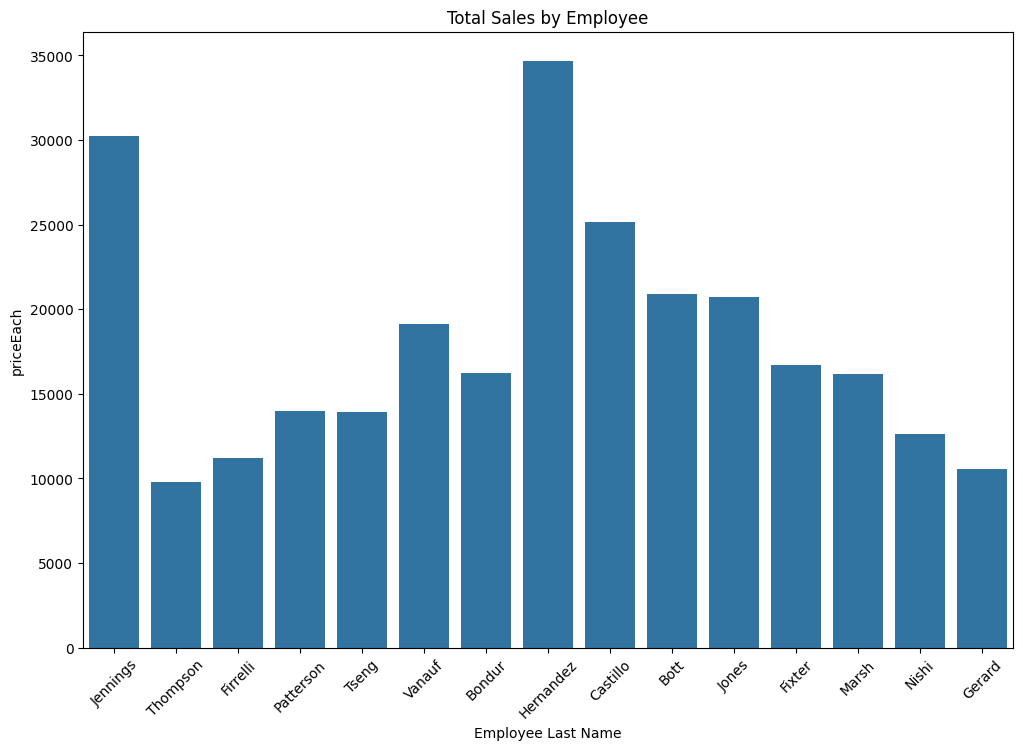

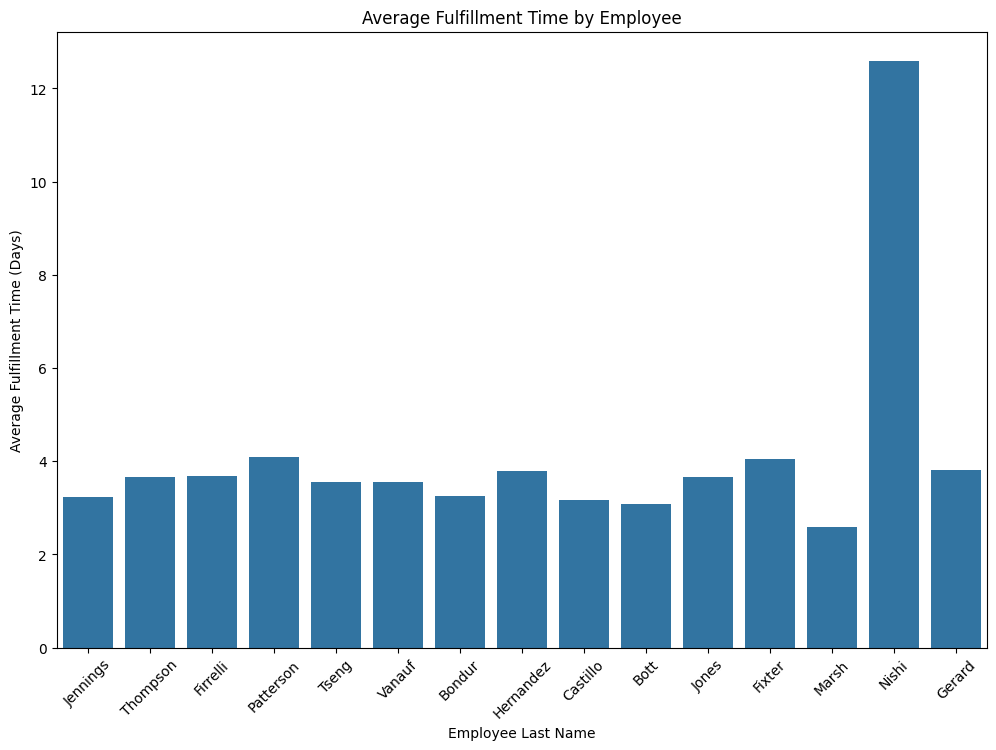

In [ ]:
# Total Sales by Employee
employee_sales = merged_data.groupby('employeeNumber')['priceEach'].sum().reset_index()
employee_sales = employee_sales.merge(employees, on='employeeNumber')

plt.figure(figsize=(12, 8))
sns.barplot(x='lastName', y='priceEach', data=employee_sales)
plt.title('Total Sales by Employee')
plt.xlabel('Employee Last Name')
plt.xticks(rotation=45)
plt.show()

# Convert the shippedDate column to datetime
if 'shippedDate' in merged_data.columns:
    merged_data['shippedDate'] = pd.to_datetime(merged_data['shippedDate'])

    # Calculate Fulfillment Time in Days
    merged_data['fulfillmentTime'] = (merged_data['shippedDate'] - merged_data['orderDate']).dt.days

    # Average Fulfillment Time by Employee
    avg_fulfillment_time = merged_data.groupby('employeeNumber')['fulfillmentTime'].mean().reset_index()
    avg_fulfillment_time = avg_fulfillment_time.merge(employees, on='employeeNumber')

    # Visualization for Average Fulfillment Time by Employee
    plt.figure(figsize=(12, 8))
    sns.barplot(x='lastName', y='fulfillmentTime', data=avg_fulfillment_time)
    plt.title('Average Fulfillment Time by Employee')
    plt.xlabel('Employee Last Name')
    plt.xticks(rotation=45)
    plt.ylabel('Average Fulfillment Time (Days)')
    plt.show()
else:
    print("The dataset does not contain 'shippedDate' to calculate fulfillment time.")



In [ ]:
nes

## Conclusions and Recommendations

### Key Findings:

*   **Regional Differences:** Europe and North America lead in revenue generation, with higher average spending per customer. Leveraging these markets through targeted campaigns will enhance profitability.

*  **Product Performance:** Classic Cars, Motorcycles and Vintage Cars are key revenue drivers. Trucks & Buses need marketing support to drive customer interest.
*   **Customer Segments:**

    *   Corporate Customers contribute substantially to revenue, while Retail Customers represent higher transaction volumes.
    *   Seasonal sales patterns indicate opportunities for optimizing marketing campaigns during specific periods.

*   **Employee Contributions:** Efficient employees directly impact sales volume and fulfillment time, suggesting a need to replicate their best practices across the team.








### Recommendations:
**Marketing Strategies:**



*   Targeted Campaigns: Prioritize Europe and North America for campaigns focusing on Classic Cars and Motorcycles.
*   Boost Underperforming Lines: Run promotional campaigns to drive interest in Planes and Trucks & Buses.




**Customer Engagement:**



*   Introduce loyalty programs for Corporate Customers to encourage repeat bulk purchases.
*   Create discounts or loyalty incentives for Retail Customers to boost average spend per transaction.




**Seasonal Inventory Management:**


*  Adjust Inventory: Increase inventory levels for Classic Cars to accommodate peak demand.
*   Seasonal Promotions: Run targeted promotions during historically slow months to boost sales.


**Employee Efficiency:**



*   Training Programs: Offer training based on the techniques of top-performing employees to improve order fulfillment efficiency across the team.
*   Incentives: Establish incentives for employees to enhance both fulfillment speed and customer service.




**Continuous Monitoring:**

*   Track customer spending trends across product lines and sales channels to identify additional cross-selling and upselling opportunities.
*   Use customer feedback to reduce product mismatches and improve overall service.







Semester Assignment Part 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import additional libraries for modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Libraries for NLP and topic modeling
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Predictive Modeling**

***Objective 1: Customer Segmentation and Lifetime Value Prediction***

*3.1 : RFM Analysis for Customer Segmentation*
RFM Analysis is a marketing analysis tool that segments customers based on their purchasing behavior:

*   Recency: How recently a customer has made a purchase.
*   Frequency: How often a customer makes a purchase.
*   Monetary: How much money a customer has spent.






Step 3.1.1: Calculate RFM Metrics

In [ ]:
# Calculate Recency (days since last order)
latest_order_date = orders['orderDate'].max()
recency = orders.groupby('customerNumber').agg({
    'orderDate': lambda x: (latest_order_date - x.max()).days
}).reset_index()
recency.columns = ['customerNumber', 'Recency']

# Calculate Frequency (number of orders per customer)
frequency = orders.groupby('customerNumber').agg({
    'orderNumber': 'count'
}).reset_index()
frequency.columns = ['customerNumber', 'Frequency']

# Calculate Monetary (total money spent by customer)
monetary = order_details.merge(orders[['orderNumber', 'customerNumber']], on='orderNumber')
monetary = monetary.groupby('customerNumber').agg({
    'priceEach': lambda x: (x * monetary.loc[x.index, 'quantityOrdered']).sum()
}).reset_index()
monetary.columns = ['customerNumber', 'Monetary']

# Merge Recency, Frequency, and Monetary into a single DataFrame
rfm_data = recency.merge(frequency, on='customerNumber').merge(monetary, on='customerNumber')

# Merge customer information for better segmentation (optional)
rfm_data = rfm_data.merge(customers, on='customerNumber')

# Display the RFM metrics
rfm_data.head()


,customerNumber,Recency,Frequency,Monetary,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,187,3,22314.36,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0
1,112,183,3,80180.98,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,183,5,180585.07,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,0,4,158573.12,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200.0
4,121,207,4,104224.79,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700.0


**RFM Distribution Visualizations**

Visualizing the distribution of Recency, Frequency, and Monetary Value metrics helps us understand the spread of the values.


*   The **Recency** distribution shows how recently customers made purchases, helping us identify groups that are engaged vs. dormant.
*   The **Frequency** distribution shows how often customers purchase, indicating loyal vs. infrequent customers.
*   The **Monetary** distribution helps us understand spending levels across customers.







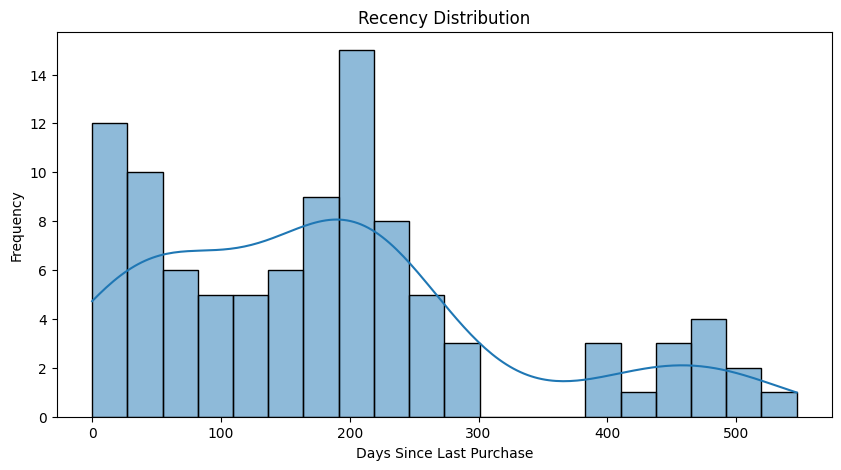

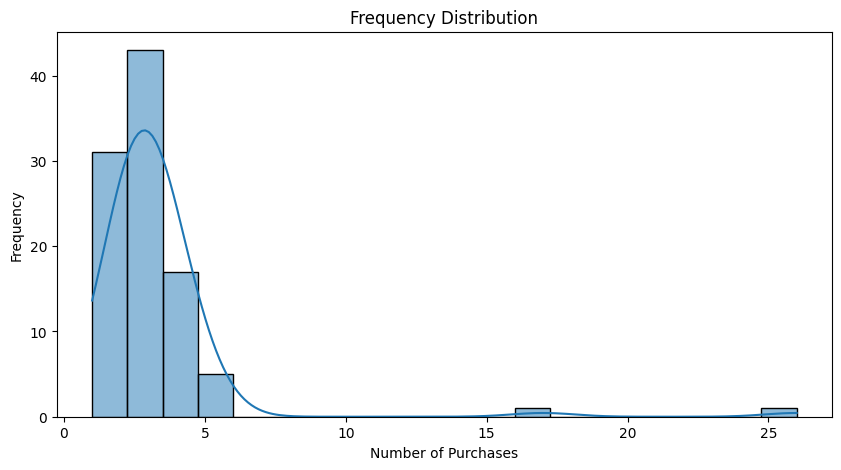

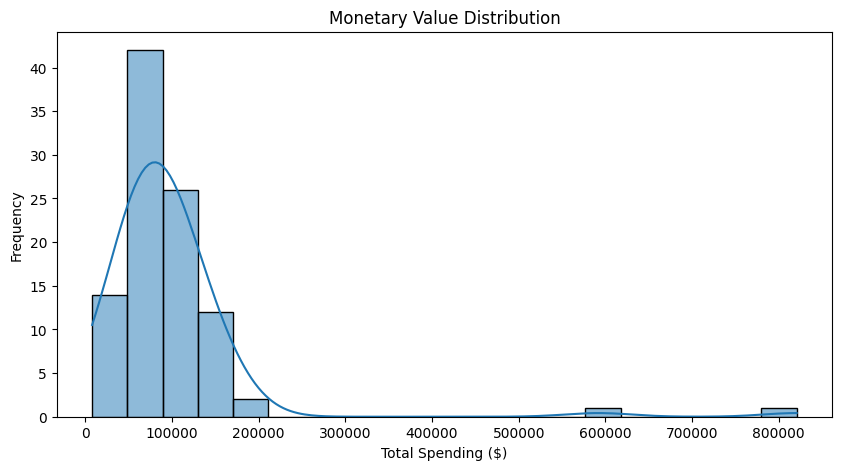

In [ ]:
# Plot Distribution for Recency
plt.figure(figsize=(10, 5))
sns.histplot(rfm_data['Recency'], kde=True, bins=20)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

# Plot Distribution for Frequency
plt.figure(figsize=(10, 5))
sns.histplot(rfm_data['Frequency'], kde=True, bins=20)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

# Plot Distribution for Monetary
plt.figure(figsize=(10, 5))
sns.histplot(rfm_data['Monetary'], kde=True, bins=20)
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spending ($)')
plt.ylabel('Frequency')
plt.show()


Step 3.1.2: Apply Clustering (K-Means) for Segmentation

In [ ]:
# Scale RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_data['RFM_Segment'] = kmeans.fit_predict(rfm_scaled)

# Display the clustered data
rfm_data.head()


,customerNumber,Recency,Frequency,Monetary,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,RFM_Segment
0,103,187,3,22314.36,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0,1
1,112,183,3,80180.98,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0,1
2,114,183,5,180585.07,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0,1
3,119,0,4,158573.12,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200.0,1
4,121,207,4,104224.79,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700.0,1


**Customer Segmentation (K-Means Clustering)**

To visualize customer segmentation, we can use scatter plots to observe how customers are grouped into different clusters.


*   Using PCA to reduce the dimensions of RFM metrics, we visualized customer clusters on a 2D plane.
*   This visualization helps us see how different customers are segmented into clusters based on their purchasing behavior.




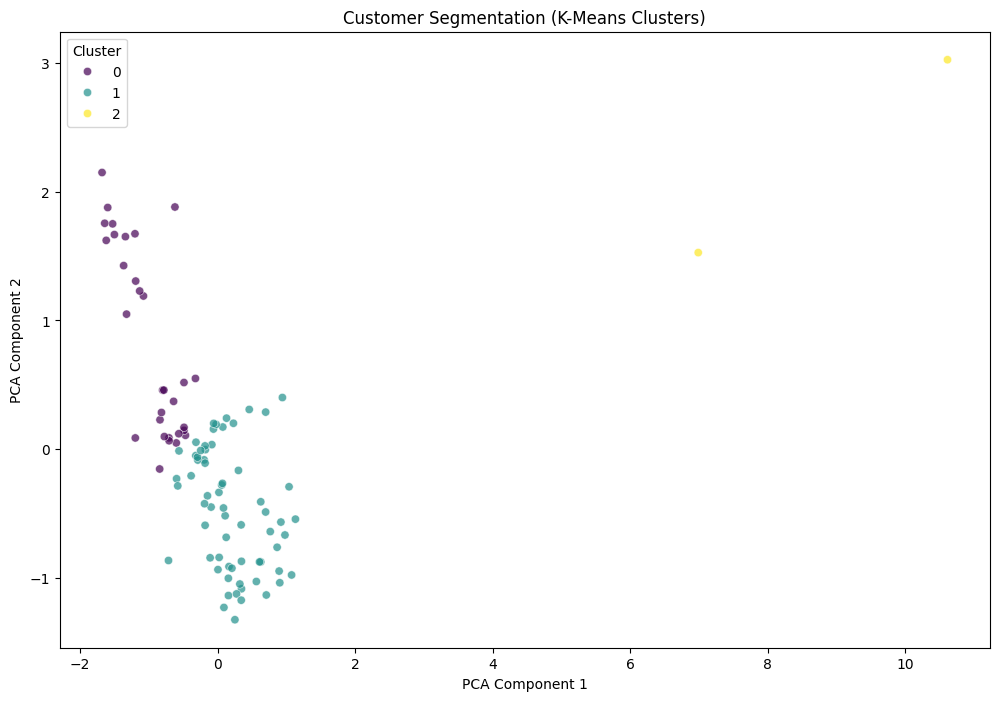

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Convert PCA results into a DataFrame
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PCA1', 'PCA2'])
rfm_pca_df['Cluster'] = rfm_data['RFM_Segment']

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm_pca_df, palette='viridis', alpha=0.7)
plt.title('Customer Segmentation (K-Means Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


**PCA Components in Customer Segmentation**

In the customer segmentation example, we used PCA to convert the RFM metrics (Recency, Frequency, Monetary) into two principal components (PCA Component 1 and PCA Component 2):

**PCA Component 1** represents the direction with the highest variance in the RFM metrics. This means that most of the information (variance) in the Recency, Frequency, and Monetary features is represented along this axis. This might capture, for example, overall spending and engagement patterns among customers.

**PCA Component 2** represents the second highest variance that is orthogonal (independent) to PCA Component 1. This component might capture variations in customers that are not captured by the first component, such as differences in frequency versus spending behavior.

Together, these two components provide a simplified 2D representation of the RFM data, which allows us to visualize the customer clusters using a scatter plot.

**Why Use PCA for Customer Segmentation Visualization?**

The original RFM data (Recency, Frequency, Monetary) has three features, and visualizing 3D space in a meaningful way is difficult in most cases.

PCA allows us to reduce the three features into two principal components, making it possible to visualize the data on a 2D scatter plot.

This allows us to see how customers are segmented into different groups based on their purchasing behavior.

**How to Interpret the PCA Scatter Plot for Customer Segmentation?**

The x-axis represents PCA Component 1 and the y-axis represents PCA Component 2.

Each point on the scatter plot represents a customer.

The clusters are formed by K-Means, and customers within the same cluster have similar RFM metrics.

The spread and grouping of points in the plot help visualize customer behavior:

Clusters that are tightly grouped mean the customers in those segments are similar to each other.

Separated clusters mean the behavior of customers is different in each group.

The scatter plot of PCA components is a powerful way to understand the patterns and groupings of customers based on their purchasing behaviors without visualizing individual RFM metrics separately.

Step 3.1.3: Predict Customer Lifetime Value (LTV)

*   For predicting LTV, we can use a Linear Regression model.




In [ ]:
# Define features (RFM) and target (Monetary)
X = rfm_data[['Recency', 'Frequency']]
y = rfm_data['Monetary']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_model.predict(X_test)

# Display model coefficients
print("Model Coefficients:", reg_model.coef_)


Model Coefficients: [2.15907006e+01 3.30895088e+04]


**Feature Importance (Using Coefficients as Insights)**

The model coefficients represent how strongly each feature (i.e., Recency, Frequency) impacts the predicted Monetary value (LTV). To make this more understandable, we can create a bar plot that shows the relative importance of each feature.

Shape of Feature Matrix (X): (98, 2)
Number of Features: 2
Number of Coefficients: 2


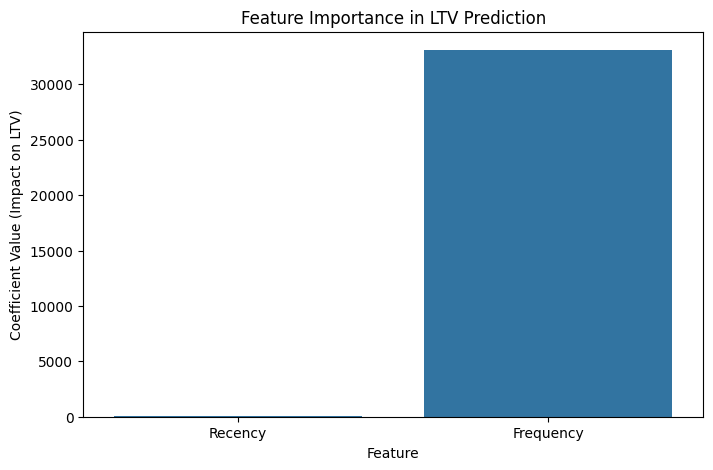

In [ ]:
# Make sure the feature matrix contains both columns
X = rfm_data[['Recency', 'Frequency']]
y = rfm_data['Monetary']

# Check the shape of X to ensure it has two columns
print(f"Shape of Feature Matrix (X): {X.shape}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Extract Coefficients
features = ['Recency', 'Frequency']
coefficients = reg_model.coef_

# Check the number of coefficients
print(f"Number of Features: {len(features)}")
print(f"Number of Coefficients: {len(coefficients)}")

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Plotting the feature importance (based on coefficients)
plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title('Feature Importance in LTV Prediction')
plt.ylabel('Coefficient Value (Impact on LTV)')
plt.xlabel('Feature')
plt.show()




**Predicted vs Actual LTV Values**

Visualizing the predicted vs actual monetary values gives us an idea of how well our model performs in predicting customer lifetime value.


*  The scatter plot compares the predicted lifetime value (LTV) for customers to the actual values.
*  Ideally, the points should align along the red dashed line, which represents perfect predictions. Deviations from this line indicate prediction errors, allowing us to evaluate the model’s performance





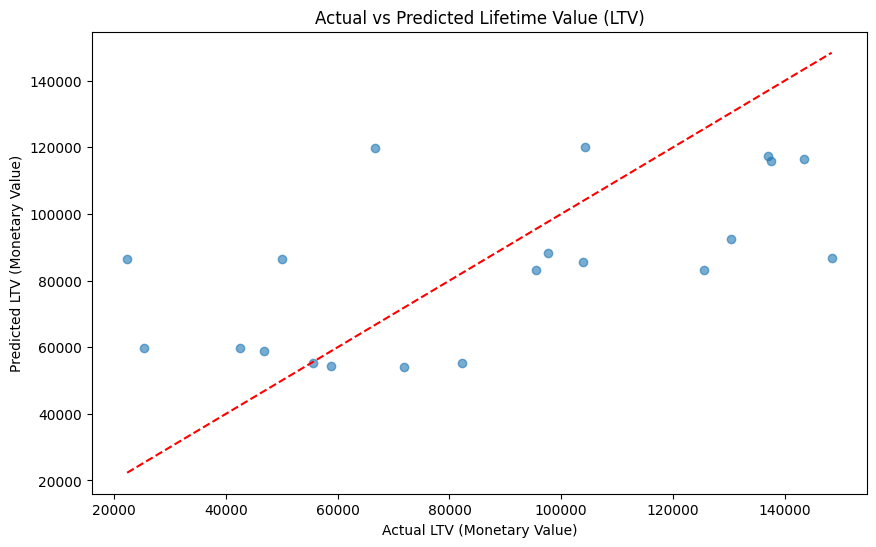

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate actual vs predicted values for Monetary
y_actual = y_test
y_predicted = y_pred

# Scatter plot to visualize actual vs predicted LTV
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_predicted, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')  # Diagonal line (perfect predictions)
plt.title('Actual vs Predicted Lifetime Value (LTV)')
plt.xlabel('Actual LTV (Monetary Value)')
plt.ylabel('Predicted LTV (Monetary Value)')
plt.show()


***Objective 2: Demand Prediction for Products***
*Step 3.2: Time Series Analysis to Predict Product Demand*

*   Forecasting the demand for each product line to optimize inventory.



Step 3.2.1: Prepare Data for Time Series Forecasting

<ipython-input-24-27394e1808d2>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2003-01-01 00:00:00', '2003-02-01 00:00:00', '2003-03-01 00:00:00',
 '2003-04-01 00:00:00', '2003-05-01 00:00:00', '2003-06-01 00:00:00',
 '2003-07-01 00:00:00', '2003-08-01 00:00:00', '2003-09-01 00:00:00',
 '2003-10-01 00:00:00', '2003-11-01 00:00:00', '2003-12-01 00:00:00',
 '2004-01-01 00:00:00', '2004-02-01 00:00:00', '2004-03-01 00:00:00',
 '2004-04-01 00:00:00', '2004-05-01 00:00:00', '2004-06-01 00:00:00',
 '2004-07-01 00:00:00', '2004-08-01 00:00:00', '2004-09-01 00:00:00',
 '2004-10-01 00:00:00', '2004-11-01 00:00:00', '2004-12-01 00:00:00',
 '2005-01-01 00:00:00', '2005-02-01 00:00:00', '2005-03-01 00:00:00',
 '2005-04-01 00:00:00', '2005-05-01 00:00:00']
Length: 29, dtype: datetime64[ns]' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  classic_cars_demand.loc[:

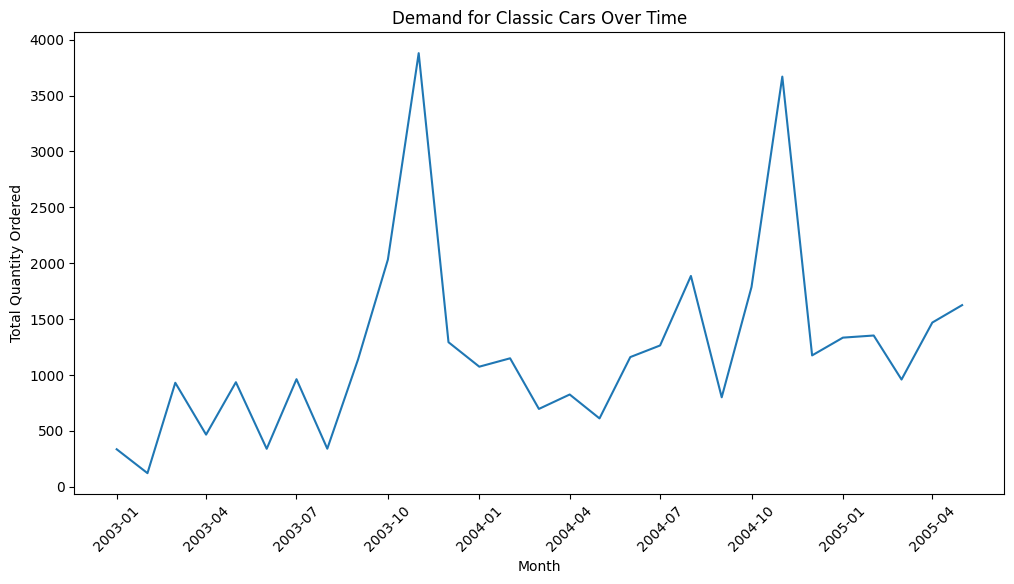

In [ ]:
# Grouping sales data by product line and month
orders['month'] = orders['orderDate'].dt.to_period('M')
demand_data = merged_data.groupby(['productLine', 'month']).agg({
    'quantityOrdered': 'sum'
}).reset_index()

# Filtering demand for one product line for demonstration purposes
classic_cars_demand = demand_data[demand_data['productLine'] == 'Classic Cars']

# Convert 'month' column to datetime format using .loc to avoid SettingWithCopyWarning
classic_cars_demand.loc[:, 'month'] = classic_cars_demand['month'].dt.to_timestamp()

# Plot the demand for Classic Cars
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='quantityOrdered', data=classic_cars_demand)
plt.title('Demand for Classic Cars Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()




Step 3.2.2: Fit Linear Regression for Demand Forecasting

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the month for numerical input
le = LabelEncoder()
# Use .loc to modify the 'month_encoded' column without triggering SettingWithCopyWarning
classic_cars_demand.loc[:, 'month_encoded'] = le.fit_transform(classic_cars_demand['month'].astype(str))


# Define features and target for prediction
X = classic_cars_demand[['month_encoded']]
y = classic_cars_demand['quantityOrdered']

# Train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Forecast the next 3 months
future_months = pd.DataFrame({'month_encoded': [max(X['month_encoded']) + i for i in range(1, 4)]})
demand_forecast = reg_model.predict(future_months)

print("Forecasted Demand for Next 3 Months:", demand_forecast)


Forecasted Demand for Next 3 Months: [1774.56157635 1811.0679803  1847.57438424]


**Explaining the Forecasted Demand**

The forecasted demand values ([1774.56, 1811.07, 1847.57]) represent the predicted demand for the next three months for Classic Cars. To make this more understandable, let's:


1.   Visualize the Forecast: Create a plot that shows the historical demand along with the forecasted values.
2.   Provide a More Contextual Explanation.





**1. Plot Historical Demand Alongside the Forecast**

We will create a plot that shows:


*   Historical Demand for Classic Cars.
*   Forecasted Demand for the next three months





<ipython-input-27-6cdf4c11332e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=classic_cars_demand['month'].max() + pd.offsets.MonthBegin(1), periods=3, freq='M')


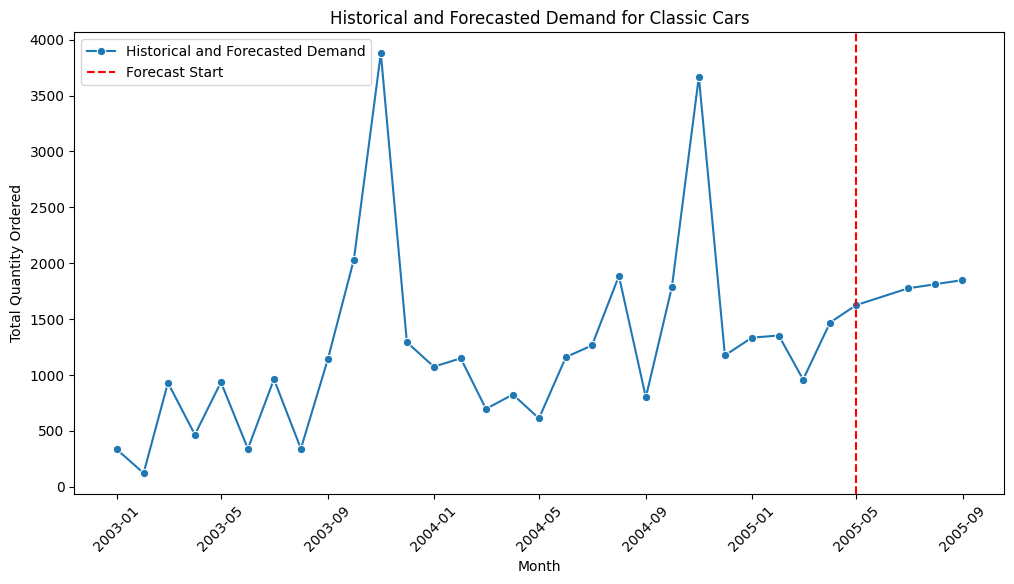

In [ ]:
import pandas as pd

# Create a DataFrame for future months with their forecasted demand
future_dates = pd.date_range(start=classic_cars_demand['month'].max() + pd.offsets.MonthBegin(1), periods=3, freq='M')
forecast_df = pd.DataFrame({'month': future_dates, 'quantityOrdered': demand_forecast})

# Combine the historical data and forecasted data for visualization
combined_demand = pd.concat([classic_cars_demand[['month', 'quantityOrdered']], forecast_df])

# Plot the historical demand and forecasted demand
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='quantityOrdered', data=combined_demand, label='Historical and Forecasted Demand', marker='o')
plt.axvline(x=classic_cars_demand['month'].max(), color='r', linestyle='--', label='Forecast Start')
plt.title('Historical and Forecasted Demand for Classic Cars')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**2. Provide a More Contextual Explanation**

**Contextual Explanation of Forecasted Demand:**


  *Forecasted Demand for Classic Cars: The model predicts that the demand for Classic Cars will increase steadily over the next three months:*


*   **Month 1**: The expected demand is 1775 units.
*   **Month 2**: The demand is expected to rise to 1811 units.


*   **Month 3**: The demand is predicted to further increase to 1848 units.




These predictions indicate a slight upward trend in the demand for Classic Cars in the coming months, which suggests that inventory for Classic Cars should be planned accordingly. It may be beneficial to increase inventory slightly to avoid stockouts and meet rising customer demand. The visualization helps clearly show the upward trend and where the forecast begins compared to the historical data.

**Explanation of the Plot:**

*  **Historical Demand**: Shown as a line graph for the months for which we have historical data.
*   **Forecasted Demand**: The predicted values for the next three months are appended to the historical data to give a comprehensive view of how demand is expected to change.
*   **Red Vertical Line (Forecast Start**): Indicates where the forecast starts, making it easy to differentiate historical data from forecasted values.







**Step 4: Topic Modeling on Comments**

Step 4.1: Text Preprocessing

In [ ]:
# Text preprocessing for customer comments
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the comments
orders['comments'] = orders['comments'].fillna('').apply(lambda x: ' '.join([lemmatizer.lemmatize(word)
                                    for word in x.lower().split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 4.2: Vectorize the Comments

In [ ]:
# Vectorize comments for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
comments_vectorized = count_vectorizer.fit_transform(orders['comments'])


Step 4.3: Apply LDA for Topic Modeling

In [ ]:
# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(comments_vectorized)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['contact', 'sale', 'warehouse', 'vp', 'material', 'marketing', 'shippment', 'requested', 'need', 'customer']
Topic 2:
['credit', 'limit', 'payment', 'dhl', 'fedex', 'order', 'requested', 'used', 'shipping', 'customer']
Topic 3:
['mismatch', 'concerned', 'sale', 'caution', 'information', 'cautious', 'order', 'models', 'color', 'customer']
Topic 4:
['sent', 'custom', 'instruction', 'warehouse', 'model', 'finance', 'agreement', 'want', 'term', 'reevaluate']


Step 4.4: Visualize Topics Using Word Cloud

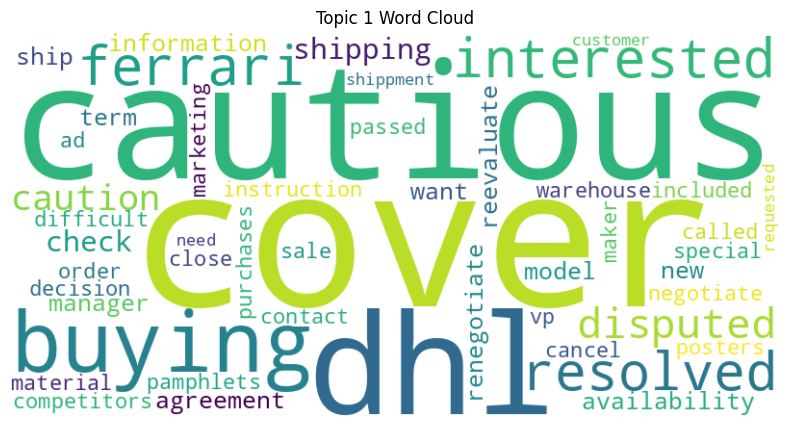

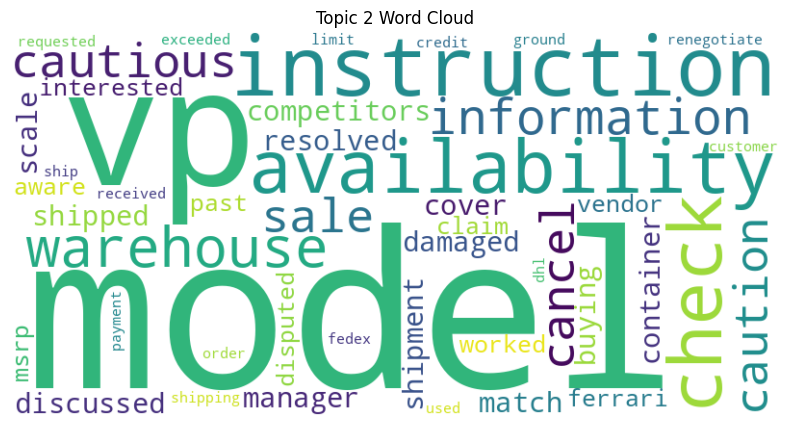

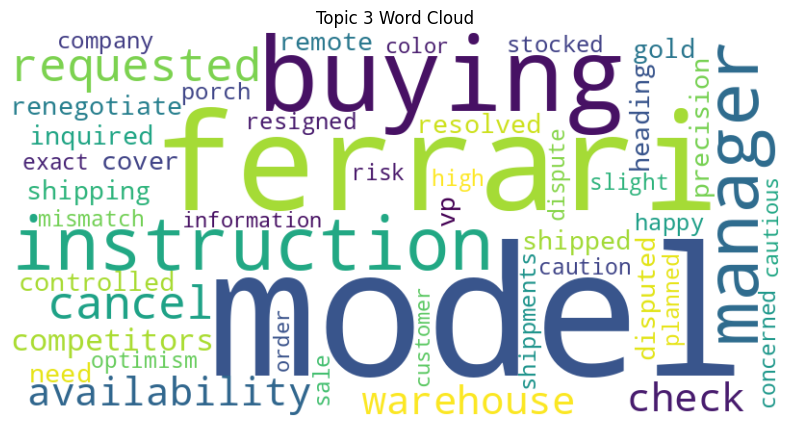

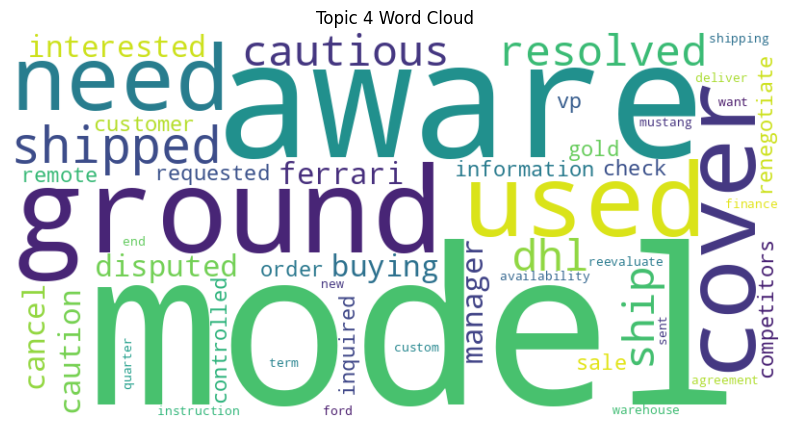

In [ ]:
for idx, topic in enumerate(lda.components_):
    topic_words = [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx + 1} Word Cloud')
    plt.show()


**Topic Modeling Results Explanation:**

Overview:
In topic modeling, the LDA (Latent Dirichlet Allocation) model groups similar words together to form topics, allowing us to discover underlying themes in the data. Here, we have extracted four topics from the customer comments, which can help us identify common issues or themes.

**Topics:**
**Topic 1: Sales and Marketing Requests**

Key Words: contact, sale, warehouse, vp, material, marketing, shipment, requested, need, customer
**Explanation:**

This topic appears to be related to sales and marketing communications and logistical needs. It likely includes customer comments regarding coordination between marketing and warehouse operations, possibly focusing on inventory or promotional needs.

Customers might be asking for more materials or information about sales and shipments.

There are frequent mentions of contact and customer, which might mean this topic is about interactions between customers and sales teams.

**Topic 2: Payment and Shipping Concerns**
Key Words: credit, limit, payment, DHL, FedEx, order, requested, used, shipping, customer

**Explanation:**

This topic seems to focus on financial aspects and shipping logistics.

Customers are mentioning credit limits, payments, and specific shipping carriers such as DHL and FedEx.

The presence of words like order, requested, and used suggests customers are inquiring about their orders, making payment arrangements, or discussing credit limits with reference to shipping.

This topic highlights potential customer concerns around shipping methods, credit terms, and payment-related issues.

**Topic 3: Product Mismatches and Issues with Sales**

Key Words: mismatch, concerned, sale, caution, information, cautious, order, models, color, customer

**Explanation:**

This topic appears to be about product mismatches or issues that customers are concerned about during sales.

Words like mismatch, concerned, caution, and information indicate that customers are reporting issues with orders—such as incorrect models or color mismatches.

The mention of caution and concern also suggests that customers are providing feedback that indicates some dissatisfaction or uncertainty about their purchases.

This might indicate a need for the company to improve quality checks or provide clearer product information to avoid such mismatches.

**Topic 4: Custom Orders and Finance Agreement**

Key Words: sent, custom, instruction, warehouse, model, finance, agreement, want, term, reevaluate

**Explanation:**

This topic focuses on custom orders and financial agreements.

The words custom, instruction, and warehouse indicate customers are discussing customized products or needing specific instructions for their orders.

Finance, agreement, and term suggest that customers are also referring to financial terms or agreements that need to be reviewed or renegotiated.

The mention of reevaluate may indicate that customers want to change the terms of a deal, indicating possible dissatisfaction or changing needs.

**Summary and Business Implications:**

**Sales and Marketing Coordination (Topic 1):**


*   Customers are actively engaging with sales and marketing, seeking more materials and shipment-related information.
*   **Action**: Improve communication channels between customers, sales, and warehouse teams to streamline information requests.






**Payment and Shipping Concerns (Topic 2):**


*   Customers have questions and concerns related to credit limits and shipping.
*   **Action**: Consider providing more flexible credit arrangements or additional information about shipping options and carriers to enhance transparency.





**Product Mismatches and Order Concerns (Topic 3):**


*   There are frequent issues related to product mismatches, which could be damaging customer satisfaction.
*   **Action**: Strengthen quality control and provide more detailed product descriptions to reduce mismatches and address customer concerns effectively.





**Custom Orders and Finance (Topic 4):**


*   Customers are expressing interest in custom orders and financial agreements, including terms and conditions.
*   **Action**: Make financial agreements more flexible, provide clear terms, and consider offering specialized support for custom orders.




